In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tabarena.icml2026.plotting.per_dataset_results import plot_model_performance_across_datasets

from tabarena.icml2026.plotting.two_figures_boxplots import boxplot_two_dataframes_pubready, boxplot_models_combined_vs_tabprep
from tabarena.icml2026.plotting.single_preprocessor_boxplots import ablation_boxplot_colored_by_best


In [2]:
base_path = "/ceph/atschalz/auto_prep/tabarena_figs/icml_final/"
all_model_results = pd.DataFrame()
all_hpo_results = pd.DataFrame()
models = ["prep_LightGBM", "prep_LinearModel", "prep_TabM", "prep_RealTabPFN"] #, "prep_RealMLP"]
for model_name in models:
    model_results = pd.read_csv(f"{base_path}/{model_name}/model_results.csv")
    model_results["model_name"] = model_name
    all_model_results = pd.concat([all_model_results, model_results]).reset_index(drop=True)

    hpo_results = pd.read_csv(f"{base_path}/{model_name}/hpo_results.csv")
    hpo_results["model_name"] = model_name
    all_hpo_results = pd.concat([all_hpo_results, hpo_results]).reset_index(drop=True)

all_model_results.shape

(26193, 14)

In [3]:
cnt_lst = []
for model_name in models:
    for dataset_name in all_model_results['dataset'].unique():
        for fold in range(3):
            # print(f"{model_name}, {dataset_name}: {all_model_results.loc[all_model_results['dataset'] == dataset_name].loc[all_model_results['model_name'] == model_name].shape[0]}")
            cnt = all_model_results.loc[all_model_results['dataset'] == dataset_name].loc[all_model_results['model_name'] == model_name].loc[all_model_results['fold'] == fold].shape[0]
            cnt_lst.append({'model_name': model_name, 'dataset': dataset_name, 'fold': fold, 'count': cnt})
        

df_cnt = pd.DataFrame(cnt_lst)

In [4]:
# df_cnt.loc[df_cnt.fold==2].sort_values(by=['count']).head(50)
df_cnt.sort_values(by=['count']).head(50)

,model_name,dataset,fold,count
591,prep_RealTabPFN,customer_satisfaction_in_airline,0,0
573,prep_RealTabPFN,GiveMeSomeCredit,0,0
575,prep_RealTabPFN,GiveMeSomeCredit,2,0
574,prep_RealTabPFN,GiveMeSomeCredit,1,0
422,prep_TabM,GiveMeSomeCredit,2,0
439,prep_TabM,customer_satisfaction_in_airline,1,0
421,prep_TabM,GiveMeSomeCredit,1,0
440,prep_TabM,customer_satisfaction_in_airline,2,0
592,prep_RealTabPFN,customer_satisfaction_in_airline,1,0
593,prep_RealTabPFN,customer_satisfaction_in_airline,2,0


### Per-dataset plot

In [5]:
from tabarena.nips2025_utils.tabarena_context import TabArenaContext
ta_context = TabArenaContext()
ta_results = pd.concat([ta_context.load_hpo_results(i) for i in ta_context.methods if "AutoGluon" not in i]).reset_index(drop=True)

In [6]:
comb_results = pd.concat([
    all_hpo_results[["dataset", "fold", "ta_name", "metric_error", "method_subtype"]], 
    ta_results[["dataset", "fold", "ta_name", "metric_error", "method_subtype"]]
    ]).reset_index(drop=True)

comb_results

,dataset,fold,ta_name,metric_error,method_subtype
0,blood-transfusion-service-center,2,prep_LightGBM,0.313604,default
1,blood-transfusion-service-center,2,prep_LightGBM,0.292908,tuned
2,blood-transfusion-service-center,2,prep_LightGBM,0.293087,tuned_ensemble
3,blood-transfusion-service-center,1,prep_LightGBM,0.237065,default
4,blood-transfusion-service-center,1,prep_LightGBM,0.212756,tuned
...,...,...,...,...,...
44845,wine_quality,4,RealTabPFN-v2.5,0.579034,tuned_ensemble
44846,wine_quality,5,RealTabPFN-v2.5,0.609024,tuned_ensemble
44847,wine_quality,6,RealTabPFN-v2.5,0.609299,tuned_ensemble
44848,wine_quality,7,RealTabPFN-v2.5,0.630704,tuned_ensemble


In [7]:
comb_results_use = comb_results.loc[comb_results['method_subtype']=="tuned_ensemble"]
comb_results_use = comb_results_use.loc[comb_results_use.fold==0]

dat_map = {
    "HR_Analytics_Job_Change_of_Data_Scientists": "HR_Analytics",
    "students_dropout_and_academic_success": "students_dropout",
    "blood-transfusion-service-center": 'blood-transfusion',
    "Another-Dataset-on-used-Fiat-500": "Fiat-500", 
    "coil2000_insurance_policies": "coil2000",
    "hazelnut-spread-contaminant-detection": "hazelnut-spread",
    "taiwanese_bankruptcy_prediction": "taiwanese_bankruptcy",
    "polish_companies_bankruptcy": "polish_companies",
    "healthcare_insurance_expenses": "healthcare_insurance",
    "in_vehicle_coupon_recommendation": "in_vehicle",
    "Amazon_employee_access": "Amazon_employee",
    "concrete_compressive_strength": "concrete",
    "customer_satisfaction_in_airline": "customer_satisfaction",
    "E-CommereShippingData": "E-Commerce",
    "online_shoppers_intention": "online_shoppers",
    "Is-this-a-good-customer": "Is-good-customer",
    "Food_Delivery_Time": "Food_Delivery",
    "credit_card_clients_default": "credit_card_clients",
    }
comb_results_use.dataset = comb_results_use.dataset.apply(lambda x: dat_map.get(x, x))

list(comb_results_use.dataset.unique())

['blood-transfusion',
 'physiochemical_protein',
 'HR_Analytics',
 'credit-g',
 'kddcup09_appetency',
 'splice',
 'anneal',
 'diamonds',
 'miami_housing',
 'Fiat-500',
 'maternal_health_risk',
 'E-Commerce',
 'heloc',
 'coil2000',
 'Bioresponse',
 'Amazon_employee',
 'credit_card_clients',
 'NATICUSdroid',
 'polish_companies',
 'hiva_agnostic',
 'churn',
 'online_shoppers',
 'Bank_Customer_Churn',
 'Marketing_Campaign',
 'superconductivity',
 'healthcare_insurance',
 'MIC',
 'qsar-biodeg',
 'Diabetes130US',
 'jm1',
 'wine_quality',
 'houses',
 'seismic-bumps',
 'QSAR-TID-11',
 'Food_Delivery',
 'airfoil_self_noise',
 'SDSS17',
 'Fitness_Club',
 'GiveMeSomeCredit',
 'concrete',
 'taiwanese_bankruptcy',
 'APSFailure',
 'bank-marketing',
 'in_vehicle',
 'customer_satisfaction',
 'diabetes',
 'students_dropout',
 'QSAR_fish_toxicity',
 'hazelnut-spread',
 'website_phishing',
 'Is-good-customer']

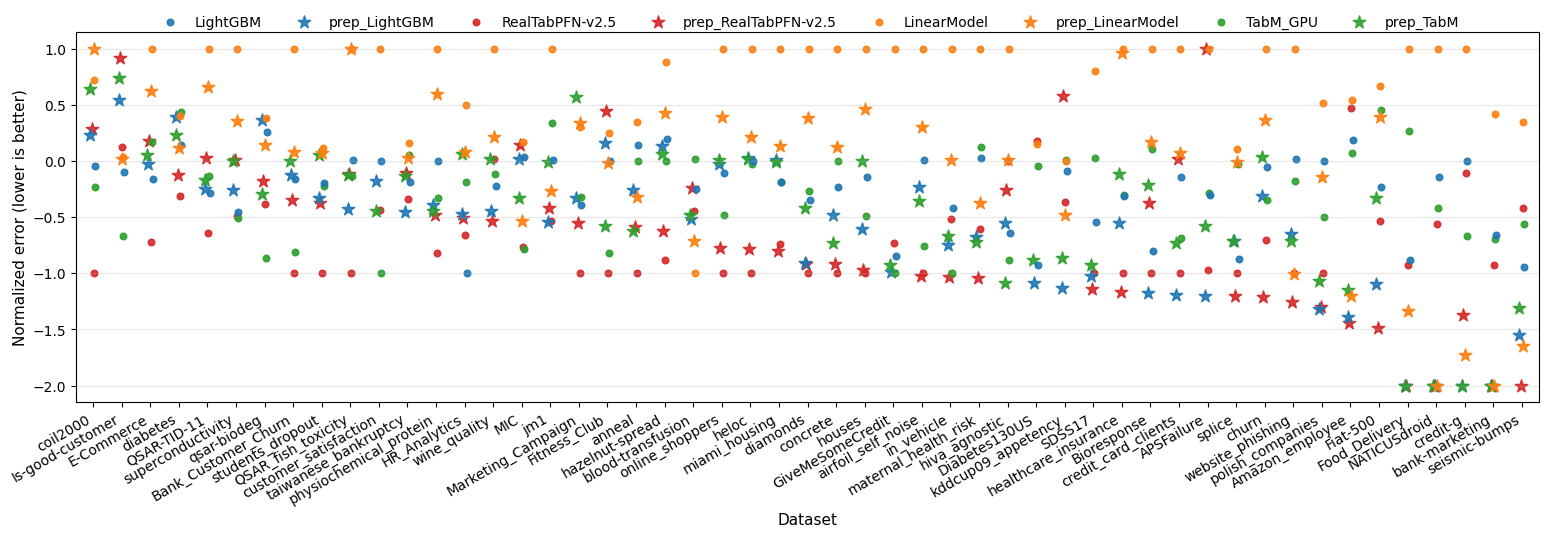

In [8]:
base_marker = "."
prep_marker = "*"

fig, ax = plot_model_performance_across_datasets(
    comb_results_use,
    model_col="ta_name",
    mode="median_centered_signed",
    normalization_reference_models=[i for i in comb_results_use.ta_name.unique() if "prep" not in i],  # define reference
    display_models=["LightGBM", "prep_LightGBM", "RealTabPFN-v2.5", "prep_RealTabPFN-v2.5", "LinearModel", "prep_LinearModel", "TabM_GPU", "prep_TabM"],
    legend_order=["LightGBM", "prep_LightGBM", "RealTabPFN-v2.5", "prep_RealTabPFN-v2.5", "LinearModel", "prep_LinearModel", "TabM_GPU", "prep_TabM"],
    title=None,
    sort_direction="worst_to_best",
    # sort_datasets_by_model="prep_LightGBM",
    sort_datasets_by_best_of_models=["prep_LightGBM", "prep_RealTabPFN-v2.5", "prep_LinearModel", "prep_TabM"],
    clip_good_side=True,
    good_side_cap=-2,
    show_model_averages=False,
    figsize=(16, 6),
    model_color_groups={
    "LightGBM": ["LightGBM", "prep_LightGBM"],
    "LinearModel": ["LinearModel", "prep_LinearModel"],
    "TabM": ["TabM_GPU", "prep_TabM"],
    "RealTabPFN": ["RealTabPFN-v2.5", "prep_RealTabPFN-v2.5"],
    },
    model_markers={
    "LightGBM": base_marker,
    "prep_LightGBM": prep_marker,
    "LinearModel": base_marker,
    "prep_LinearModel": prep_marker,
    "TabM_GPU": base_marker,
    "prep_TabM": prep_marker,
    "RealTabPFN-v2.5": base_marker,
    "prep_RealTabPFN-v2.5": prep_marker,
    },
    font_size=11,
    title_font_size=13,
    legend_font_size=10,
    tick_font_size=10,    
    save_path="/ceph/atschalz/auto_prep/tabarena/tabarena/tabarena/icml2026/figures/final_model_performance_across_datasets.pdf",

    # dataset_order="relative",
)


### Comparison to openFE & autoFeat

In [9]:
base_path = "/ceph/atschalz/auto_prep/tabarena_figs/icml_ablation"
ablation_model_results = pd.read_csv(f"{base_path}/model_results.csv")
ablation_hpo_results = pd.read_csv(f"{base_path}/hpo_results.csv")

ablation_model_results = ablation_model_results.loc[ablation_model_results.fold==0]

In [10]:
autofeat_comp_df = ablation_model_results.loc[ablation_model_results.method=="AutoFeatLinearModel_c1_BAG_L1",["dataset", "metric_error"]]
autofeat_comp_df.rename(columns={"metric_error": "AutoFeat"}, inplace=True)
base_lr_df = ablation_model_results.loc[ablation_model_results.method=="LinearModel_c1_BAG_L1",["dataset", "metric_error"]]
base_lr_df.rename(columns={"metric_error": "LinearModel"}, inplace=True)

autofeat_comp_df = autofeat_comp_df.merge(base_lr_df, on="dataset", suffixes=("_autofeat", "_baseLR"))
autofeat_comp_df.rename(columns={"metric_error_baseLR": "LinearModel"}, inplace=True)

only_order2 = ablation_model_results.loc[ablation_model_results.method=="AutoFeatLinearModel_c2_BAG_L1",["dataset", "metric_error"]]
# autofeat_comp_df.merge(base_lr_df, on="dataset", suffixes=("_autofeat", "_baseLR"))
only_order2 = only_order2.rename(columns={"metric_error": "AutoFeat (2-order)"})

autofeat_comp_df = autofeat_comp_df.merge(only_order2, on="dataset")


prep_lr = all_hpo_results.loc[np.logical_and(
    all_hpo_results.method=="prep_LR (default)",
    all_hpo_results.fold==0),["dataset", "metric_error"]].rename(columns={"metric_error": "PrepLinearModel"})

autofeat_comp_df = autofeat_comp_df.merge(prep_lr, on="dataset", suffixes=("", "_prep_lr"))
autofeat_comp_df

,dataset,AutoFeat,LinearModel,AutoFeat (2-order),PrepLinearModel
0,blood-transfusion-service-center,0.256053,0.254912,0.244035,0.269649
1,credit-g,0.244145,0.226966,0.227479,0.198162
2,splice,0.142766,0.142766,0.142766,0.149412
3,anneal,0.550395,0.127725,0.115993,0.071563
4,Another-Dataset-on-used-Fiat-500,734.808934,728.593947,728.576648,711.140884
5,maternal_health_risk,0.910165,0.772202,0.762520,0.403717
6,healthcare_insurance_expenses,4576.517975,5575.862768,5570.098157,5526.076217
7,wine_quality,0.691345,0.721465,0.717245,0.643593
8,seismic-bumps,0.239054,0.239120,0.238139,0.184810
9,Fitness_Club,0.197217,0.204666,0.204496,0.202000


In [11]:
openfe_comp_df = ablation_model_results.loc[ablation_model_results.method=="OpenFELGBModel_c1_BAG_L1",["dataset", "metric_error"]]
openfe_comp_df.rename(columns={"metric_error": "OpenFE"}, inplace=True)
base_lgb_df = ta_results.loc[np.logical_and(
    ta_results.method=="GBM (default)",
    ta_results.fold==0),["dataset", "metric_error"]].rename(columns={"metric_error": "LightGBM"})



openfe_comp_df = openfe_comp_df.merge(base_lgb_df, on="dataset", suffixes=("_openfe", "_baseLGB"))
openfe_comp_df


prep_lgb_df = all_hpo_results.loc[np.logical_and(
    all_hpo_results.method=="prep_GBM (default)",
    all_hpo_results.fold==0),["dataset", "metric_error"]].rename(columns={"metric_error": "PrepLightGBM"})

openfe_comp_df = openfe_comp_df.merge(prep_lgb_df, on="dataset")
openfe_comp_df

# only_order2 = ablation_model_results.loc[ablation_model_results.method=="AutoFeatLinearModel_c2_BAG_L1",["dataset", "metric_error"]]
# # autofeat_comp_df.merge(base_lr_df, on="dataset", suffixes=("_autofeat", "_baseLR"))
# only_order2 = only_order2.rename(columns={"metric_error": "metric_error_autofeat_only_order2"})

# autofeat_comp_df = autofeat_comp_df.merge(only_order2, on="dataset")


# prep_lr = all_hpo_results.loc[np.logical_and(
#     all_hpo_results.method=="prep_LR (default)",
#     all_hpo_results.fold==0),["dataset", "metric_error"]]

# autofeat_comp_df = autofeat_comp_df.merge(prep_lr, on="dataset", suffixes=("", "_prep_lr"))
# autofeat_comp_df

,dataset,OpenFE,LightGBM,PrepLightGBM
0,blood-transfusion-service-center,0.320702,0.337061,0.326667
1,credit-g,0.233291,0.230299,0.192051
2,Another-Dataset-on-used-Fiat-500,712.759554,727.096140,687.407644
3,maternal_health_risk,0.407015,0.452020,0.370881
4,healthcare_insurance_expenses,4200.046498,4235.509730,4120.573289
5,wine_quality,0.610526,0.617681,0.595164
6,seismic-bumps,0.197232,0.220312,0.218743
7,Fitness_Club,0.214960,0.206897,0.213797
8,concrete_compressive_strength,4.441690,4.609973,4.256915
9,diabetes,0.176908,0.182597,0.176774


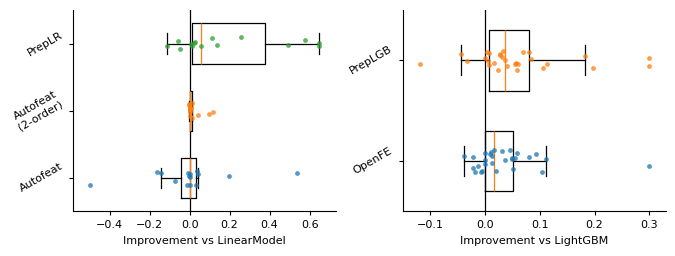

(<Figure size 680x260 with 2 Axes>,
 (<Axes: xlabel='Improvement vs LinearModel'>,
  <Axes: xlabel='Improvement vs LightGBM'>),
 (    AutoFeat  AutoFeat (2-order)  PrepLinearModel
  0  -0.004464            0.043607        -0.056202
  1  -0.072964           -0.002257         0.135713
  2  -0.000000           -0.000000        -0.045506
  3  -0.500000            0.096344         0.579299
  4  -0.008494            0.000024         0.024246
  5  -0.164380            0.012617         0.648531
  6   0.197509            0.001034         0.008969
  7   0.042644            0.005865         0.114217
  8   0.000273            0.004110         0.257636
  9   0.037073            0.000832         0.013110
  10  0.537440            0.116942         0.649286
  11  0.030157            0.013480        -0.114523
  12 -0.143401           -0.001795         0.028812
  13 -0.012219           -0.000000         0.058890
  14 -0.000000           -0.000000         0.491387,
            OpenFE  PrepLightGBM
  0   

In [12]:
# --- Your exact call (publication-ready, flipped, independent scales, with saving) ---
boxplot_two_dataframes_pubready(
    df_left=autofeat_comp_df,
    left_baseline_col="LinearModel",
    left_competitor_cols=["AutoFeat", "AutoFeat (2-order)", "PrepLinearModel"],
    df_right=openfe_comp_df,
    right_baseline_col="LightGBM",
    right_competitor_cols=["OpenFE", "PrepLightGBM"],
    left_labels=["Autofeat", "Autofeat\n(2-order)", "PrepLR"],
    right_labels=["OpenFE", "PrepLGB"],
    mode="log_ratio",
    cap_left=[-0.5,1],
    cap_right=[-0.5,0.3],
    # titles=("Linear Models", "LightGBM"),
    horizontal=True,
    share_scale=False,
    save_path="/ceph/atschalz/auto_prep/tabarena/tabarena/tabarena/icml2026/figures/autoFE_boxplots.pdf",
    dpi=300,
    transparent=True,
)


### Contribution of single preprocessors

In [13]:
setting_map = {
    "prep_LightGBM-ablation_c1_BAG_L1": "Arithmetic",
    "prep_LightGBM-ablation_c2_BAG_L1": "RSFC",
    "prep_LightGBM-ablation_c3_BAG_L1": "CombineThenTE",
    "prep_LightGBM-ablation_c4_BAG_L1": "OOF-TE",
    "prep_LightGBM-ablation_c5_BAG_L1": "GroupBy",
    "prep_LightGBM-ablation_c6_BAG_L1": "AbsoluteGroupBy",
    "prep_LightGBM-ablation_c7_BAG_L1": "OOF-TE-keepcat",
    "prep_LightGBM-ablation_c8_BAG_L1": "OOF-TE_w_GroupBy",
    "prep_LightGBM-ablation_c9_BAG_L1": "Arithmetic (2-order)",
    "prep_LightGBM-ablation_c10_BAG_L1": "Arithmetic (prod,ratio)",
    "prep_LightGBM-ablation_c11_BAG_L1": "Arithmetic (sum,diff)",
               }

In [14]:
prep_lgb_df["method"] = "PrepLightGBM"
prep_lgb_df.rename(columns={"PrepLightGBM": "metric_error"}, inplace=True)
prep_lgb_df = prep_lgb_df[["dataset", "method", "metric_error"]]

In [15]:
prep_ablation_df = ablation_model_results.loc[ablation_model_results.method.apply(lambda x: x.startswith("prep_LightGBM-ablation")),["dataset", "method", "metric_error"]]
prep_ablation_df["method"] = prep_ablation_df["method"].map(setting_map)
prep_ablation_df = pd.concat([prep_ablation_df,prep_lgb_df], axis=0).reset_index(drop=True)
prep_ablation_df

,dataset,method,metric_error
0,blood-transfusion-service-center,"Arithmetic (prod,ratio)",0.312544
1,blood-transfusion-service-center,"Arithmetic (sum,diff)",0.338070
2,blood-transfusion-service-center,NaN,0.313772
3,blood-transfusion-service-center,NaN,0.313772
4,blood-transfusion-service-center,Arithmetic,0.314649
...,...,...,...
622,students_dropout_and_academic_success,PrepLightGBM,0.564454
623,QSAR_fish_toxicity,PrepLightGBM,0.906669
624,hazelnut-spread-contaminant-detection,PrepLightGBM,0.029606
625,website_phishing,PrepLightGBM,0.218581


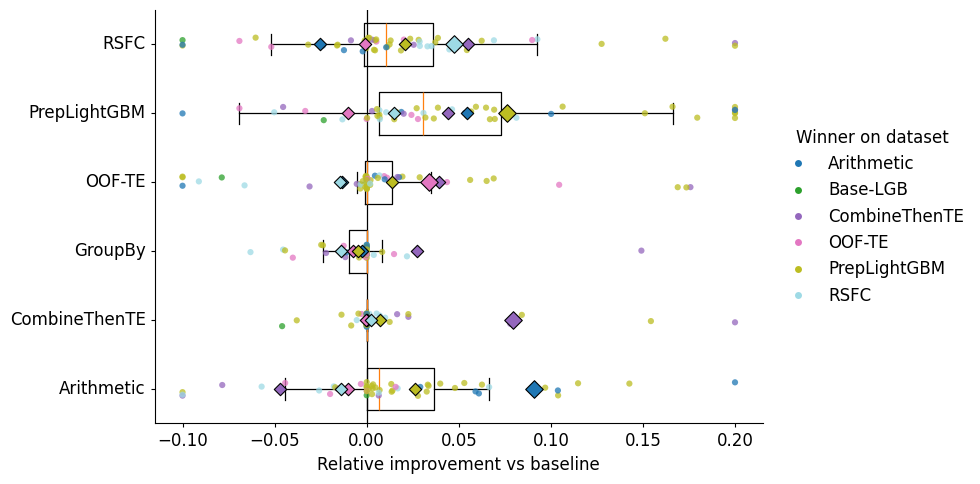

In [16]:
# Adapted call matching your current usage (same args / names reminded).
# Assumes you already defined ablation_boxplot_colored_by_best exactly as in the last code block.

# methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy", "OOF-TE_w_GroupBy"]

methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy"]
methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy", "PrepLightGBM"]



fig, ax, merged_long, best_by_ds, color_by_method = ablation_boxplot_colored_by_best(
    prep_ablation_df=prep_ablation_df.loc[prep_ablation_df.method.isin(methods_keep)],
    base_df=base_lgb_df,
    dataset_col="dataset",
    method_col="method",
    metric_col="metric_error",
    base_metric_col="LightGBM",          # baseline column in base_lgb_df
    baseline_name="Base-LGB",
    winner_rule="methods_or_baseline",   # baseline can win (and wins ties)
    winner_atol=1e-12,
    winner_rtol=0.0,

    # plot scoring + limits
    mode="relative",
    cap=(-0.1, 0.2),

    # optional tie dropping from plot (off in your example)
    drop_equal_to_baseline=False,

    # style
    figsize=(10, 5),
    jitter=0.10,
    point_size=20.0,
    point_alpha=0.75,
    title=None,

    mean_marker_size_main=80,
    mean_marker_size_other=40,
    xlabel_fontsize=12.0,
    font_size=12,


    # saving
    save_path="figures/prep_ablation_colored.pdf",
    dpi=300,
    transparent=True,
)


In [17]:
prep_ablation_df.loc[prep_ablation_df.dataset=="anneal"]

,dataset,method,metric_error
39,anneal,"Arithmetic (prod,ratio)",0.069921
40,anneal,"Arithmetic (sum,diff)",0.079446
41,anneal,NaN,0.043300
42,anneal,NaN,0.043579
43,anneal,Arithmetic,0.080706
44,anneal,RSFC,0.044990
45,anneal,CombineThenTE,0.037794
46,anneal,OOF-TE,0.059824
47,anneal,GroupBy,0.061756
48,anneal,AbsoluteGroupBy,0.040393


In [18]:
pd.Series(best_by_ds).value_counts()

PrepLightGBM     28
RSFC              8
Arithmetic        5
OOF-TE            5
CombineThenTE     4
Base-LGB          1
Name: count, dtype: int64

In [19]:
prep_ablation_df.loc[prep_ablation_df.dataset=="credit-g"]

,dataset,method,metric_error
13,credit-g,"Arithmetic (prod,ratio)",0.241838
14,credit-g,"Arithmetic (sum,diff)",0.237137
15,credit-g,NaN,0.215983
16,credit-g,NaN,0.215470
17,credit-g,Arithmetic,0.260940
18,credit-g,RSFC,0.233932
19,credit-g,CombineThenTE,0.210897
20,credit-g,OOF-TE,0.215299
21,credit-g,GroupBy,0.235769
22,credit-g,AbsoluteGroupBy,0.210513


### Combined trials vs. TabPrep-only trials

In [20]:
nonprep_res_path = {
    "RealTabPFN-v2.5": "/home/atschalz/.cache/tabarena/artifacts/tabarena-2025-11-12/methods/RealTabPFN-v2.5/results/model_results.parquet",
    "LightGBM": "/home/atschalz/.cache/tabarena/artifacts/tabarena-2025-06-12/methods/LightGBM/results/model_results.parquet",
    "TabM": "/home/atschalz/.cache/tabarena/artifacts/tabarena-2025-06-12/methods/TabM_GPU/results/model_results.parquet",
    # ""
    }

In [21]:
df_combined_trials = pd.DataFrame()
# df_prep_trials = pd.DataFrame(index=all_model_results.dataset.unique())
for use_model in ["RealTabPFN-v2.5", "LightGBM", "TabM"]:
    df_old = pd.read_parquet(nonprep_res_path[use_model])
    df_old = df_old.loc[df_old.fold==0]
    # display(df.loc[df.dataset=="credit-g", ["dataset", "method", "metric_error"]])

    comb_df = pd.concat([
    df_old,
    all_model_results.loc[np.logical_and(all_model_results.fold==0, all_model_results.ta_name==f"prep_{use_model}")]
    ])

    df_combined_trials[f"{use_model}_combined"] = comb_df.groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])
    df_combined_trials[f"{use_model}_baseModel"] = df_old.groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])
    df_combined_trials[f"{use_model}_prepModel"] = all_model_results.loc[np.logical_and(all_model_results.fold==0, all_model_results.ta_name==f"prep_{use_model}")].groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])

df_combined_trials


/tmp/ipykernel_104899/1979892481.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_combined_trials[f"{use_model}_combined"] = comb_df.groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])
/tmp/ipykernel_104899/1979892481.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_combined_trials[f"{use_model}_baseModel"] = df_old.groupby("dataset").apply(lambda x: x.metric_error.loc[x.

,RealTabPFN-v2.5_combined,RealTabPFN-v2.5_baseModel,RealTabPFN-v2.5_prepModel,LightGBM_combined,LightGBM_baseModel,LightGBM_prepModel,TabM_combined,TabM_baseModel,TabM_prepModel
dataset,,,,,,,,,
APSFailure,0.005023,0.005023,0.010102,0.003439,0.005129,0.003439,0.005237,0.005237,0.007242
Amazon_employee_access,0.121649,0.154477,0.121649,0.116271,0.155627,0.116271,0.121912,0.159647,0.121912
Another-Dataset-on-used-Fiat-500,671.234962,697.417691,671.234962,709.295170,709.295170,677.548469,721.954437,721.954437,683.296127
Bank_Customer_Churn,0.119812,0.119812,0.124792,0.126308,0.125569,0.126308,0.121159,0.121159,0.127873
Bioresponse,0.111488,0.111488,0.116786,0.112133,0.112133,0.108738,0.123889,0.123889,0.121358
Diabetes130US,0.333989,0.333989,0.343123,0.318269,0.322105,0.318269,0.318579,0.326425,0.318579
E-CommereShippingData,0.260676,0.258422,0.260676,0.259007,0.259995,0.259007,0.263546,0.263546,0.259265
Fitness_Club,0.190232,0.190232,0.192548,0.197841,0.197841,0.198673,0.194476,0.194476,0.193058
Food_Delivery_Time,7.208150,7.424939,7.208150,7.229753,7.420115,7.229753,7.249947,7.692887,7.249947


In [22]:
df_combined_trials.idxmin(axis=1).value_counts()

RealTabPFN-v2.5_combined     26
LightGBM_combined             7
TabM_combined                 7
RealTabPFN-v2.5_prepModel     3
LightGBM_prepModel            2
RealTabPFN-v2.5_baseModel     2
LightGBM_baseModel            2
TabM_baseModel                1
TabM_prepModel                1
Name: count, dtype: int64

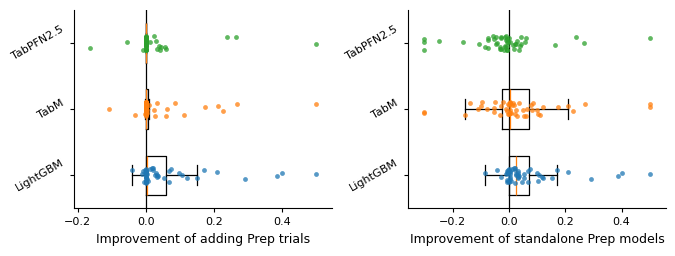

In [23]:
fig, (axL, axR), (scores_combined, scores_prep) = boxplot_models_combined_vs_tabprep(
    df=df_combined_trials,  # index = dataset names
    models=["LightGBM", "TabM", "RealTabPFN-v2.5"],
    model_labels=["LightGBM", "TabM", "TabPFN2.5"],
    baseline_cfg="baseModel",
    left_cfg="combined",
    right_cfg="prepModel",
    mode="log_ratio",
    lower_is_better=True,
    cap_left=(-0.5, 0.5),
    cap_right=(-0.3, 0.5),
    horizontal=True,
    share_scale=False,
    titles = (None, None),
    save_path="figures/combined_trials_vs_prep_only.pdf",
    dpi=300,
    transparent=True,
)
